### IMPORTS

In [57]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
SAVE_PATH = "../saves/"

In [60]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

In [61]:
savefiles = [file for file in os.listdir(SAVE_PATH) if file != "pareto.csv"] 
savefiles

['saves_1710424156961.csv',
 'saves_1710424454746.csv',
 'saves_1710424515049.csv',
 'saves_1710424637019.csv',
 'saves_1710424916129.csv',
 'saves_1710429089587.csv',
 'saves_1710429514728.csv',
 'saves_1710429727788.csv',
 'saves_1710429865873.csv',
 'saves_1710429985239.csv',
 'saves_1710430130919.csv',
 'saves_1710430150347.csv',
 'saves_1710430307672.csv',
 'saves_1710430871920.csv',
 'saves_1710431208782.csv',
 'saves_1710433005888.csv',
 'saves_1710433038829.csv',
 'saves_1710433067539.csv',
 'saves_1710433104086.csv',
 'saves_1710433145786.csv',
 'saves_1710433231572.csv',
 'saves_1710433284422.csv',
 'saves_1710433317750.csv',
 'saves_1710433333342.csv',
 'saves_1710433396034.csv',
 'saves_1710433430620.csv',
 'saves_1710433540895.csv',
 'saves_1710433601737.csv',
 'saves_1710433642142.csv',
 'saves_1710433666142.csv',
 'saves_1710433698580.csv',
 'saves_1710433876094.csv',
 'saves_1710436421269.csv',
 'saves_1710436501194.csv',
 'saves_1710437276237.csv',
 'saves_171043733861

### VISUALIZATION

In [62]:
pareto = pd.read_csv(SAVE_PATH+'pareto.csv', sep=';')
pareto

,utilA,utilB,utilSum,contract,pareto
0,1944,8220,10164,"[180,76,25,48,10,176,83,129,8,84,67,61,74,108,...",True
1,2023,8144,10167,"[34,122,1,118,10,176,83,129,8,84,67,48,92,108,...",True
2,1989,8186,10175,"[34,122,25,48,10,176,83,129,8,84,67,61,74,108,...",True
3,2008,8168,10176,"[71,2,25,48,10,176,83,129,8,84,67,61,74,108,21...",True
4,1987,8192,10179,"[49,67,25,48,10,176,83,129,8,84,122,73,74,108,...",True
...,...,...,...,...,...
185,9582,6549,16131,"[50,174,23,136,149,189,59,57,3,130,163,171,12,...",True
186,9624,6547,16171,"[73,174,23,136,149,189,171,57,3,130,163,59,12,...",True
187,9675,6546,16221,"[50,174,23,136,149,189,171,57,3,130,163,59,12,...",True
188,9847,6545,16392,"[50,174,23,91,75,18,171,57,3,130,163,59,12,185...",True


In [63]:
for savefile in savefiles:
    contracts = pd.read_csv(SAVE_PATH + savefile, sep=';')
    if "pareto" not in contracts.columns:
        contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
        contracts = contracts.sort_values(by="utilSum", ascending=False).drop_duplicates()
        contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
    pareto = pd.concat([pareto, contracts[contracts["pareto"]]])
pareto = pareto.sort_values(by="utilSum", ascending=False).drop_duplicates()
pareto["pareto"] = get_pareto(pareto[["utilA","utilB"]])
pareto = pareto[pareto["pareto"]].sort_values(by="utilSum", ascending=True)
pareto.to_csv(SAVE_PATH+'pareto.csv', sep=';', index=False)
pareto

,utilA,utilB,utilSum,contract,pareto
9523,2342,7558,9900,"[146,114,64,79,185,54,52,25,98,3,120,178,118,4...",True
9272,2235,7668,9903,"[146,114,64,79,185,62,98,25,115,78,120,178,118...",True
9527,2361,7551,9912,"[34,114,64,79,185,54,52,25,98,3,120,178,118,48...",True
9555,2384,7545,9929,"[146,114,64,79,185,54,52,199,3,98,120,178,118,...",True
9363,2297,7636,9933,"[146,114,64,79,185,54,25,52,61,115,120,178,118...",True
...,...,...,...,...,...
865,9488,6542,16030,"[73,174,67,36,149,152,59,57,3,136,163,86,12,18...",True
891,9539,6541,16080,"[50,174,67,36,149,152,59,57,3,136,163,86,12,18...",True
600,9605,6539,16144,"[73,174,23,136,149,152,59,57,3,36,163,86,12,18...",True
567,9656,6538,16194,"[50,174,23,136,149,152,59,57,3,36,163,86,12,18...",True


(1089.1, 10194.9, 6406.35, 9280.65)

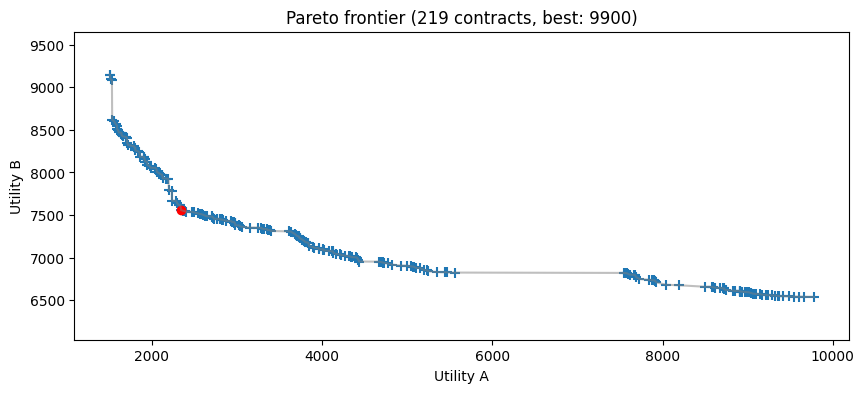

In [68]:
pareto = pareto.sort_values(by="utilA", ascending=True)
best_util = pareto.sort_values(by="utilSum").iloc[0]
plt.figure(figsize=(10,4))
plt.title(f"Pareto frontier ({len(pareto)} contracts, best: {best_util['utilSum']})")
plt.plot(pareto["utilA"], pareto["utilB"], color='gray', linestyle='-', alpha=0.5)
plt.scatter(pareto["utilA"], pareto["utilB"], s=50, marker="+")
plt.scatter(best_util["utilA"], best_util["utilB"], marker="o", color="red")
plt.xlabel("Utility A")
plt.ylabel("Utility B")
plt.axis("equal")

In [65]:
pareto.shape

(219, 5)